# Tasca M8 T01


## Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ds = pd.read_csv('Publicacions Facebook Thailandia.csv', sep=',')
df = pd.DataFrame(ds)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


- Este DataFrame cuenta con 7050 filas y 16 columnas

In [2]:
df.shape

(7050, 16)

- El nombre de cada columna es: 
1) 'status_id', 
2) 'status_type', 
3) 'status_published', 
4) 'num_reactions',
5) 'num_comments',
6) 'num_shares',
7) 'num_likes',
8) 'num_loves',
9) 'num_wows',
10) 'num_hahas',
11) 'num_sads',
12) 'num_angrys',
13) 'Column1',
14) 'Column2',
15) 'Column3',
16) 'Column4'

In [3]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

- Se observará si hay datos nulos

In [4]:
df.isnull().sum().sort_values(ascending = False)

Column1             7050
Column2             7050
Column3             7050
Column4             7050
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
dtype: int64

- Se observará si hay datos NaN

In [5]:
df.isna().sum().sort_values(ascending = False)

Column1             7050
Column2             7050
Column3             7050
Column4             7050
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

- Se observa que hay 7050 registros en casi todas las columnas, menos en las siguientes: "Column1", "Column2", "Column3", "Column4". Al parecer no forman parte de los datos originales. Se eliminarán estas columnas para realizar el análisis.

In [7]:
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], axis=1) 

df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


**Descripción del DataSet**

Encontramos un DataSet con 7050 registros que corresponde a publicaciones de facebook dividido en las siguientes columnas:

- 1) **status_id**: Id de la publicación.
- 2) **status_type**: Tipo de publicación: link, video, status y foto.
- 4) **status_published**: Fecha y hora de la publicación.
- 5) **num_reactions**: Número de reacciones a la publicación (me gusta, me encanta, me sorprende, me divierte, me enoja)
- 6) **num_comments**: Número de comentarios a la publicación
- 7) **num_shares**: Número de veces que se compartió la publicación
- 8) **num_likes**: Número de me gusta
- 9) **num_loves**: Número de me encanta
- 10) **num_wows**: Número de me sorprende
- 11) **num_hahas**: Número de me divierte
- 12) **num_sads**: Número de me importa
- 13) **num_angrys**: Número de me enoja



- Se realizará la consulta del tipo de variables que tiene el DataFrame.

In [8]:
df.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [9]:
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

- De los 7050 registros, 6997 son valores únicos, por lo que alrededor de 53 registros pueden estar duplicadas en la columna "status_id".

- Se eliminarán los duplicados por la columna status_id.

In [10]:
df = df.drop_duplicates(subset='status_id', keep='last')

df.shape

(6997, 12)

- Se realizará la exploración de los datos. 

In [11]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

-  Se realizará el análisis estadístico de las varaibles numéricas

In [12]:
estadisticos_cont(df.select_dtypes('number'))

# Analisis estadisticos de las varaibles numericas
#df.describe().T

,count,mean,median,std,min,25%,50%,75%,max
num_reactions,6997.0,224.951979,58.0,452.930082,0.0,17.0,58.0,216.0,4710.0
num_comments,6997.0,225.613977,4.0,892.863091,0.0,0.0,4.0,22.0,20990.0
num_shares,6997.0,40.269973,0.0,132.064065,0.0,0.0,0.0,4.0,3424.0
num_likes,6997.0,209.899814,57.0,439.595761,0.0,17.0,57.0,182.0,4710.0
num_loves,6997.0,12.755181,0.0,40.112024,0.0,0.0,0.0,3.0,657.0
num_wows,6997.0,1.253251,0.0,8.726772,0.0,0.0,0.0,0.0,278.0
num_hahas,6997.0,0.698156,0.0,3.971462,0.0,0.0,0.0,0.0,157.0
num_sads,6997.0,0.232671,0.0,1.481312,0.0,0.0,0.0,0.0,51.0
num_angrys,6997.0,0.110190,0.0,0.688678,0.0,0.0,0.0,0.0,31.0


- Se realizará el análisis estadístico de las variables categoricas

In [13]:
#Analisis estadisticos de las variables categoricas
df.describe(include = ['O']).T

,count,unique,top,freq
status_id,6997,6997,246675545449582_1649696485147474,1
status_type,6997,4,photo,4242
status_published,6997,6911,11/19/2017 1:51,2


[Text(0.5, 0, 'Status Type'), Text(0, 0.5, 'Count')]

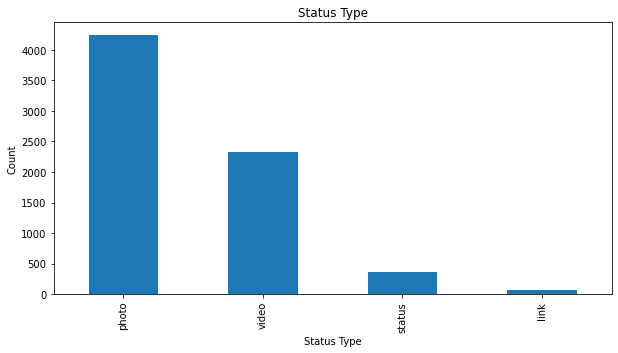

In [14]:
st_ax = df.status_type.value_counts().plot(kind='bar', figsize=(10,5), title='Status Type')
st_ax.set(xlabel='Status Type', ylabel='Count')

- La mayoría de los anuncios son mediante fotos. 


- Se realizará la eliminación de las variables: "status_ id" y "status_published" porque no se las utilizarán ya que se hará la clausterización en función del tipo de publicación.


In [15]:
df= df.drop(columns=['status_id', 'status_published'], axis=1) 

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


**Preprocesado de los datos**

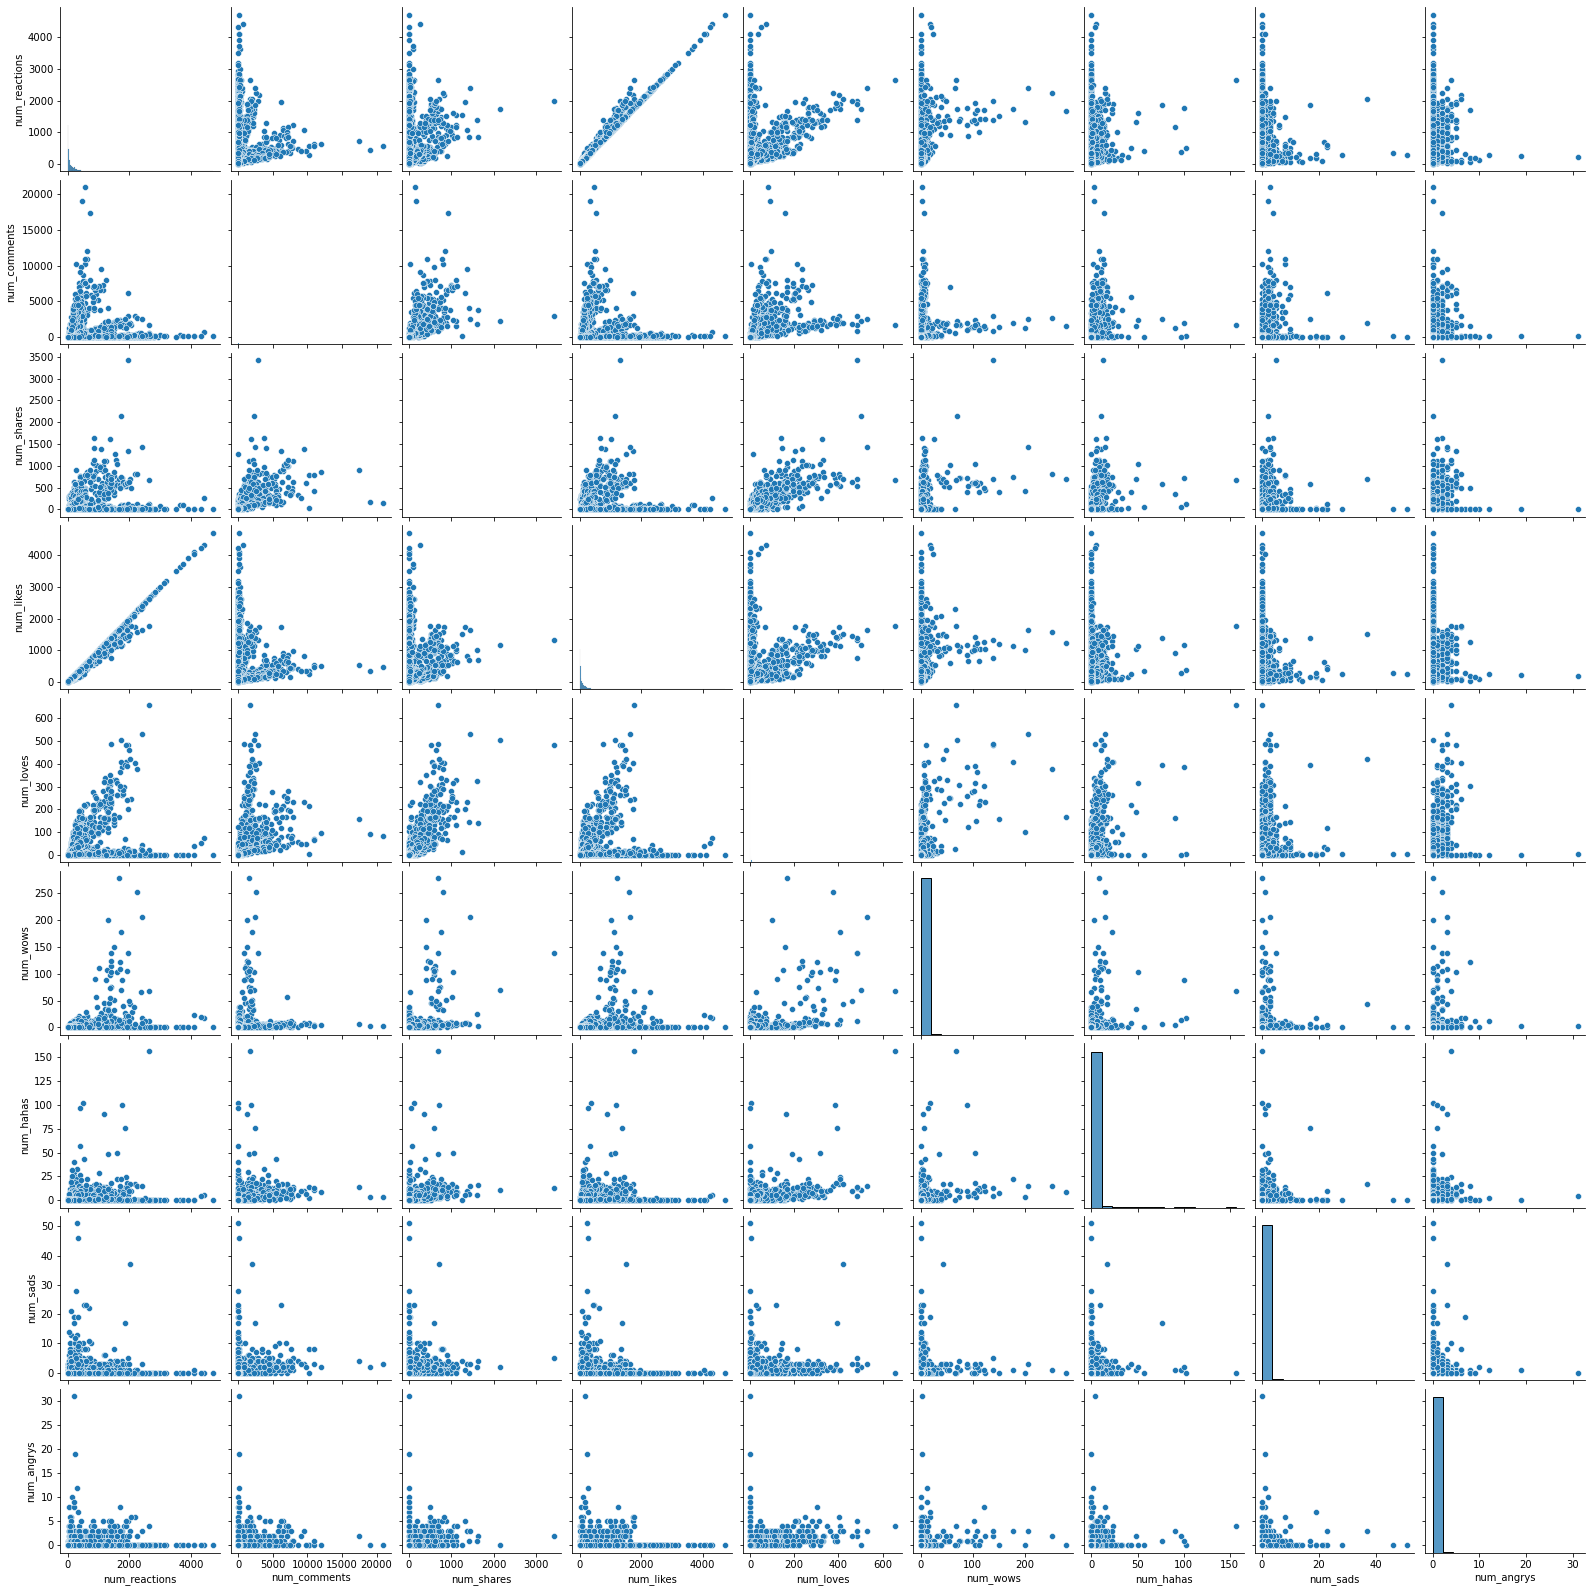

In [16]:
sns.pairplot(df)
plt.show()

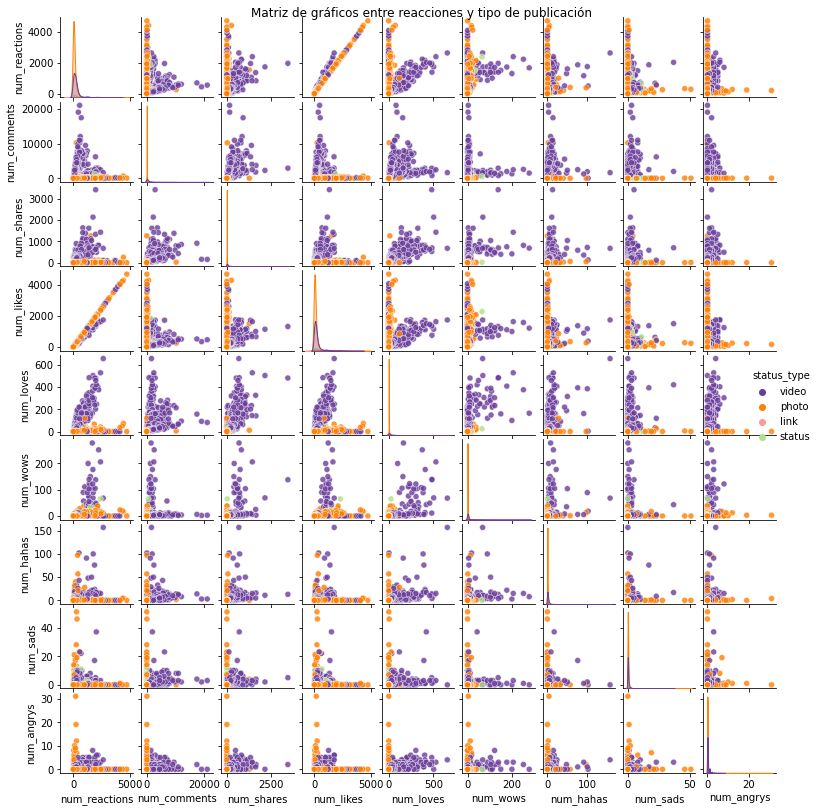

In [17]:
# pairplot con "status_type"
ax = sns.pairplot(data=df,
                 vars = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
                         'num_hahas', 'num_sads', 'num_angrys'],
                 hue='status_type',
                 plot_kws={'alpha':0.8},
                 palette='Paired_r',
                 kind='scatter')
ax.fig.suptitle('Matriz de gráficos entre reacciones y tipo de publicación', y=1)
ax.fig.set_size_inches(11,11)


plt.show()

- Se realizará dummies a la columna "status_type".

In [18]:
df = pd.get_dummies(df,  prefix= 'type', columns=['status_type'])

df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


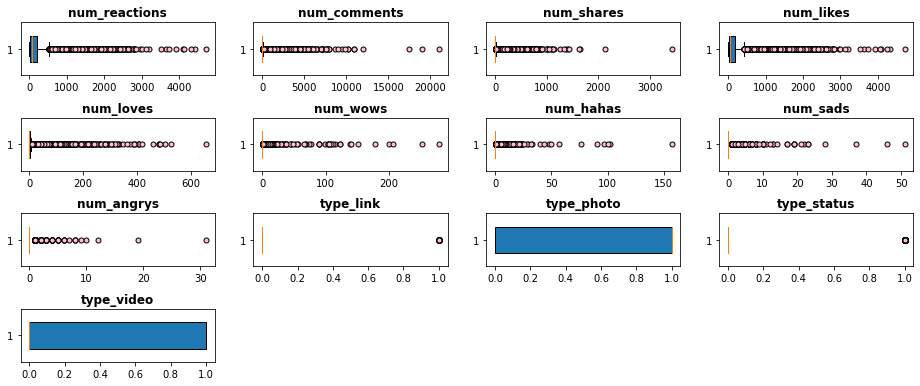

In [19]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='pink', marker='o', markeredgecolor='black', ms=5)

fig, axes = plt.subplots(5, 4, figsize=(16, 8))

for idx, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
    ax.boxplot(df[col], flierprops=red_circle, vert=False,
              patch_artist=True, notch = False, widths = 0.5)
    ax.set_title(col, fontweight='bold')
    plt.subplots_adjust(wspace=.2, hspace=.8)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

<Figure size 432x288 with 0 Axes>

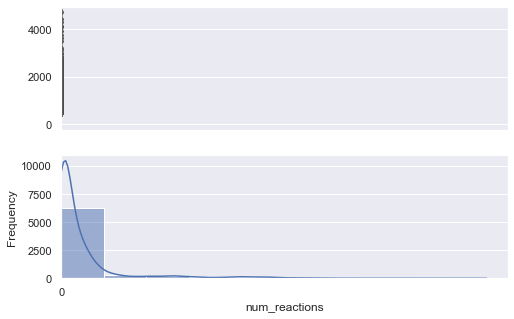

<Figure size 576x360 with 0 Axes>

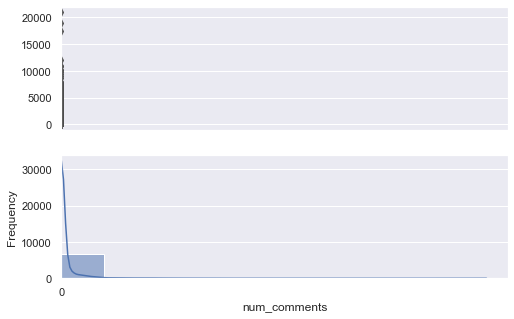

<Figure size 576x360 with 0 Axes>

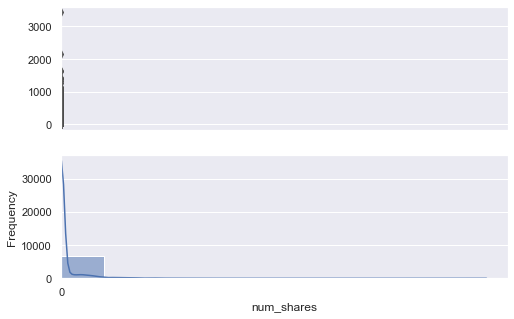

<Figure size 576x360 with 0 Axes>

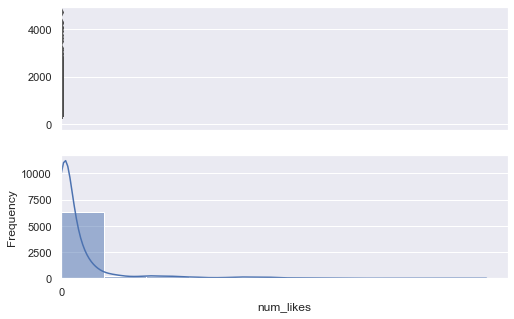

<Figure size 576x360 with 0 Axes>

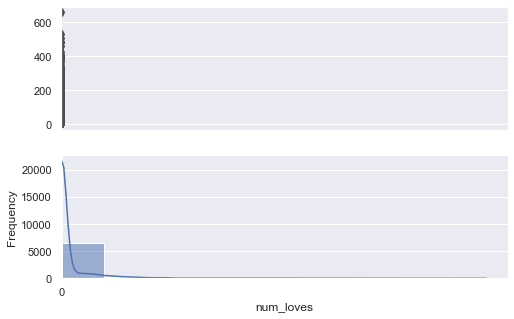

<Figure size 576x360 with 0 Axes>

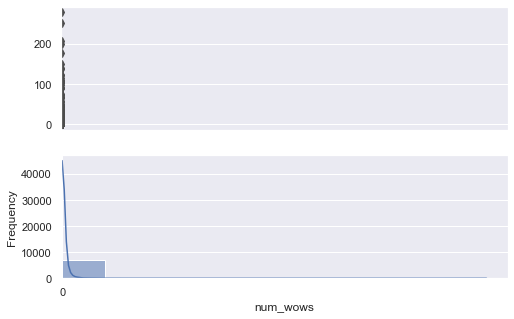

<Figure size 576x360 with 0 Axes>

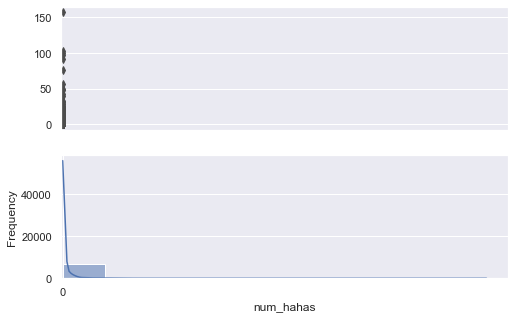

<Figure size 576x360 with 0 Axes>

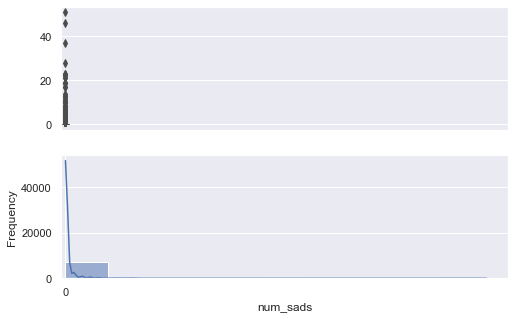

<Figure size 576x360 with 0 Axes>

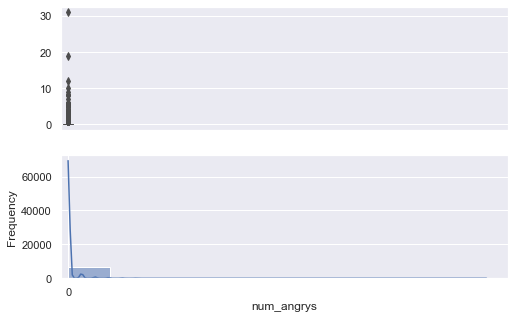

<Figure size 576x360 with 0 Axes>

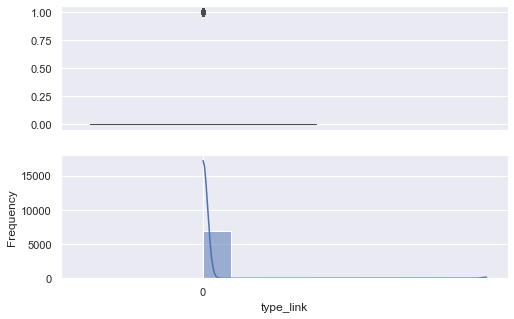

In [20]:
for i in df.iloc[:,0:10]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={'figure.figsize':(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [21]:
corr = df.corr()
corr.shape

(13, 13)

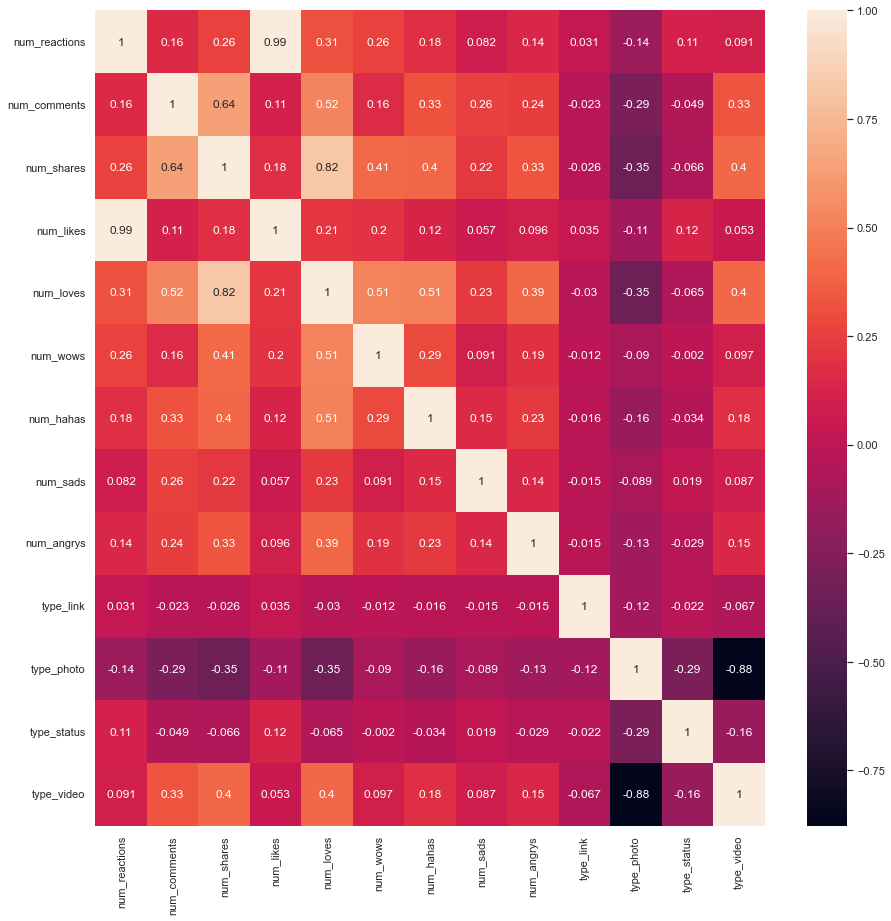

In [22]:
plt.figure(figsize=(15, 15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

- Se observa una correlación positiva de mediana intensidad igual a 0,64 entre "num_shares" y "num_comments"


Se realizará el preprocesado del DataSet para transformar los datos. Se utilizará el Test de Shapiro para conocer si los datos tienen distribución normal.

In [23]:
from scipy import stats

print('Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).')
print('Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
    else:
        print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

Hipotesis nula (Ho): La muestra tiene una distribución normal (Probablemente Gaussiana).
Hipotesis alternativa (H1): La muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable num_reactions tiene un p-value=  0.0
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable num_comments tiene un p-value=  0.0
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable num_shares tiene un p-value=  0.0
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable num_likes tiene un p-value=  0.0
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable num_loves tiene un p-value=  0.0
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable num_wows tiene un p-value=  0.0
Se rec

- Se realizará **Robust Scaler** a aquellas variables que tienen outliers.

In [24]:
from sklearn import preprocessing 

df_pre = df.copy()

#RobustScaler para las columnas con outliers
columnsR = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
            'num_hahas', 'num_sads', 'num_angrys']
scalerRobust = preprocessing.RobustScaler().fit(df_pre[columnsR])
df_pre[columnsR] = scalerRobust.transform(df_pre[columnsR])

df_pre.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0


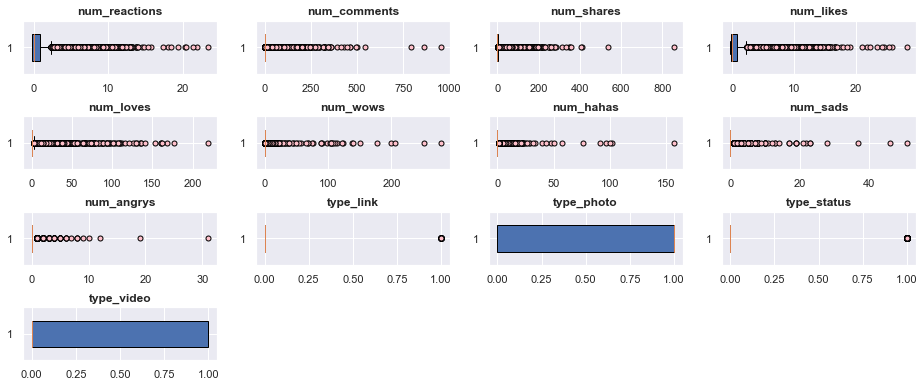

In [25]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='pink', marker='o', markeredgecolor='black', ms=5)

fig, axes = plt.subplots(5, 4, figsize=(16, 8))

for idx, (col, ax) in enumerate(zip(df_pre.columns, axes.flatten())):
    ax.boxplot(df_pre[col], flierprops=red_circle, vert=False,
              patch_artist=True, notch = False, widths = 0.5)
    ax.set_title(col, fontweight='bold')
    plt.subplots_adjust(wspace=.2, hspace=.8)
else:
    [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

<Figure size 576x360 with 0 Axes>

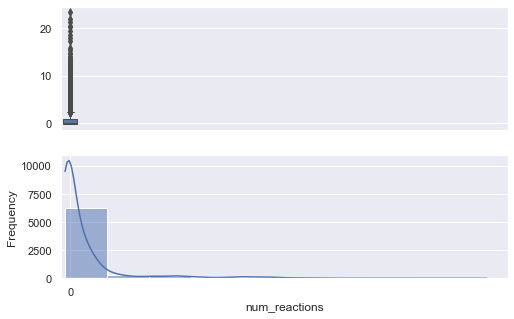

<Figure size 576x360 with 0 Axes>

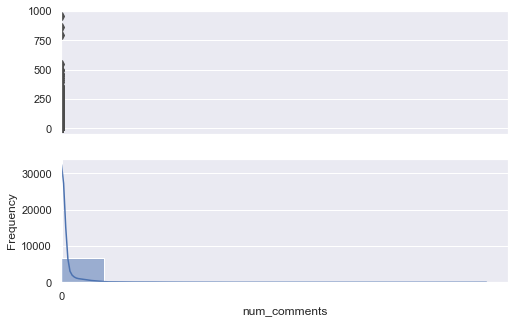

<Figure size 576x360 with 0 Axes>

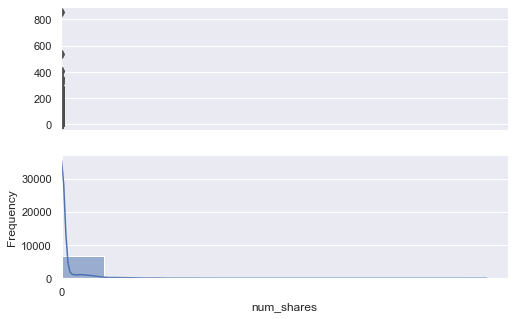

<Figure size 576x360 with 0 Axes>

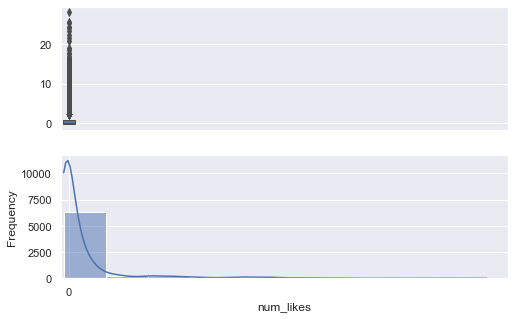

<Figure size 576x360 with 0 Axes>

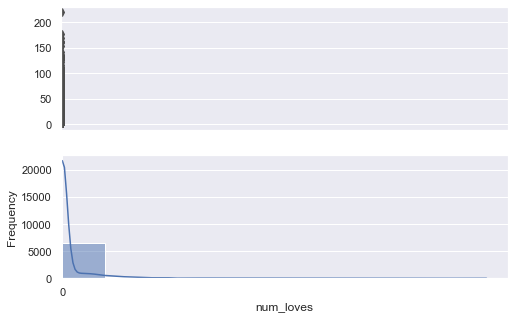

<Figure size 576x360 with 0 Axes>

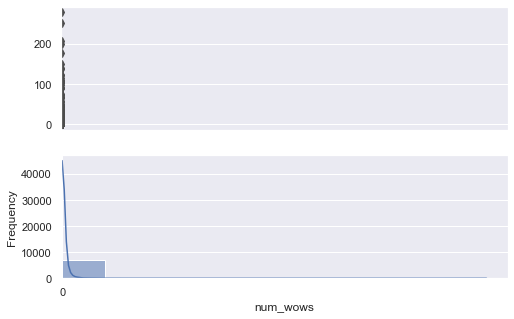

<Figure size 576x360 with 0 Axes>

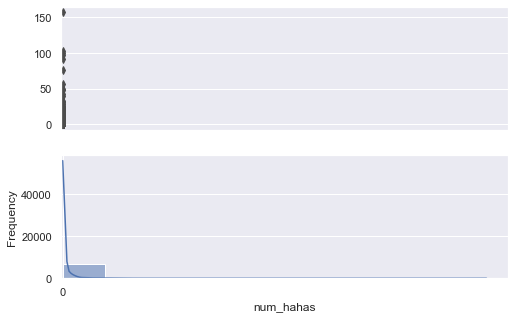

<Figure size 576x360 with 0 Axes>

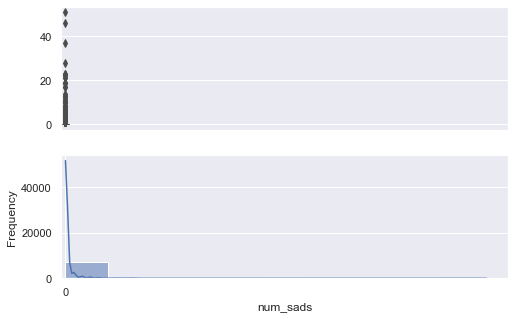

<Figure size 576x360 with 0 Axes>

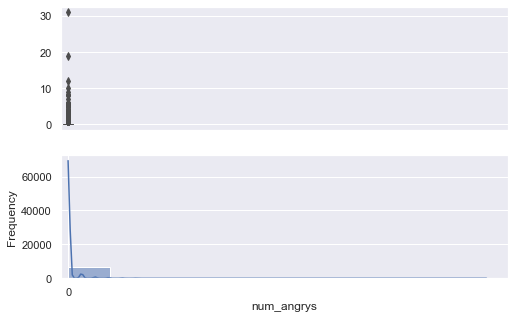

<Figure size 576x360 with 0 Axes>

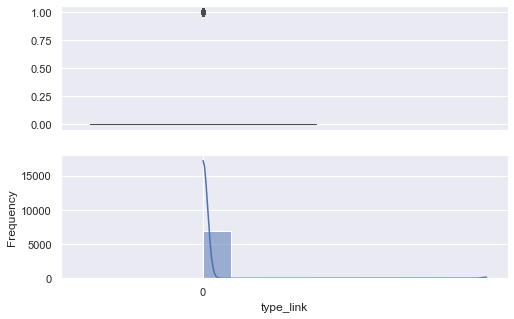

In [26]:
for i in df_pre.iloc[:,0:10]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_pre[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df_pre[i], ax=ax_hist , bins = 10,kde=True)

**PCA (Principal Component Analisis)**

- **PCA** es un método muy utilizado de aprendizaje no supervisado, que permite reducir el número de dimensiones tratando de recoger la mayor parte de la variabilidad de los datos originales 

Text(0, 0.5, 'Varianza acumulada explicada')

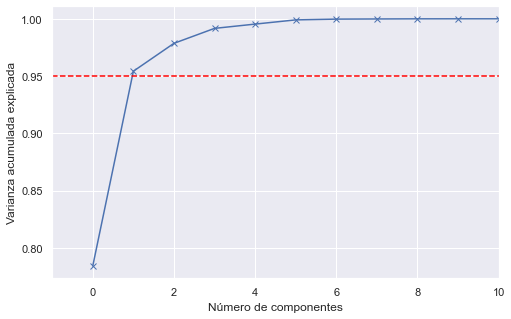

In [27]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_pre)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker= 'x')
plt.axhline(0.95, color = "red", linestyle = "--")
plt.xlim([-1, 10])
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')

- El número de componentes para conservar un 95% de la información original podría estar entre 1 y 2. 
- Se lo entrenerá evitar perder más de un 5% de información.

In [28]:
pca = PCA(.95).fit(df)
print('Número de componentes para conservar el 95% de la información original es:', pca.n_components_)

Número de componentes para conservar el 95% de la información original es: 2


- Se eligirán 2 componentes para realizar la agrupación de todas las varibles

In [29]:
pca = PCA(n_components=2)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df_pre), columns=['Componente 1', 'Componente 2'], index=df.index)
df_pca.head()

,Componente 1,Componente 2
0,-249.415312,-262.515115
1,-279.731570,-261.943082
2,-267.589818,-263.129327
3,-279.785080,-262.243553
4,-279.578128,-261.469812


**Método K-means**


- Para utilizar el algoritmo de K-means, es necesario definir el número de K (clusters), por lo que se usará "Elbow Method" para buscar el número de clusters.

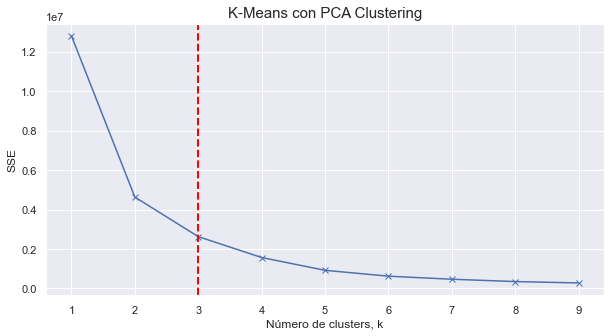

In [30]:
from sklearn.cluster import KMeans

ks = range(1, 10)
# SSE es (Sum of Squared errors)
SSE = []

for i in range(1, 10):
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=i, random_state= 42)
    
    # Fit model to samples
    kmeans.fit(df_pca)
    
    # Append the inertia to the list of inertias
    SSE.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))    
plt.plot(ks, SSE, '-o', marker='x')
plt.axvline(x = 3, ymin = 0, color = 'red', linewidth =2, ls = '--' )
plt.xlabel('Número de clusters, k')
plt.ylabel('SSE')
plt.title('K-Means con PCA Clustering', fontsize=15)
plt.xticks(ks)
plt.show()

In [31]:
!pip install --upgrade kneed
from kneed import KneeLocator

kl = KneeLocator(ks, SSE, curve="convex", direction="decreasing")


print('Número de clusters convenientes:', kl.elbow)
kl.elbow

Número de clusters convenientes: 3


3

- En el gráfico en el que se utiliza el "Elbow Method", mediante el cual se busca el "punto de inflexión del codo", se observa que la cantidad de clusters a utilizar en el modelo son 3.  

In [32]:
# Inicialización del modelo y entrenamiento (Nota: 42 es una convención, 
#pero la idea es fijar un punto a donde comienza el algoritmo)

k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(df_pca)

#predicciones
k_means_pred = k_means.predict(df_pca)
k_means_pred

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
#Se creará una copia del DF para sumarles los cluster
df_cluster = df.copy()

df_cluster['Cluster_K-means'] = k_means_pred
df_cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,Cluster_K-means
0,529,512,262,432,92,3,1,1,0,0,0,0,1,0
1,150,0,0,150,0,0,0,0,0,0,1,0,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1,0
3,111,0,0,111,0,0,0,0,0,0,1,0,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0,0


In [34]:
df_cluster['Cluster_K-means'].value_counts()

0    6571
1     368
2      58
Name: Cluster_K-means, dtype: int64

<AxesSubplot:xlabel='Cluster_K-means', ylabel='count'>

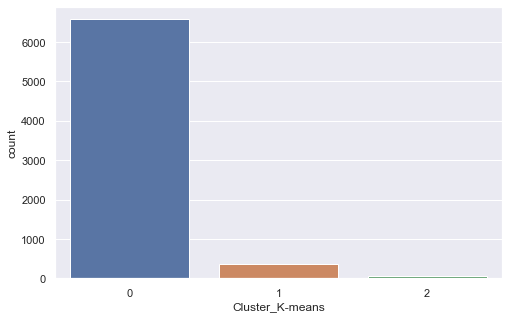

In [35]:
sns.countplot(x = df_cluster['Cluster_K-means'])

- En la gráfica se observan los 3 clusters formados y una acumulación de datos en el Cluster 0.Cerca del 90% de los registros pertenecen a este. 

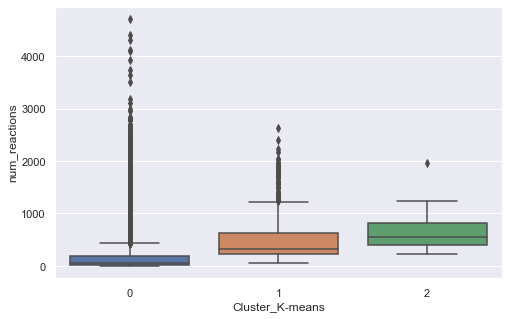

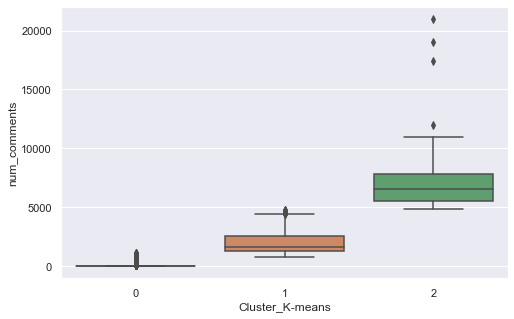

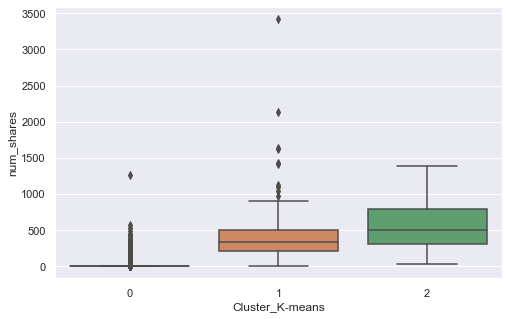

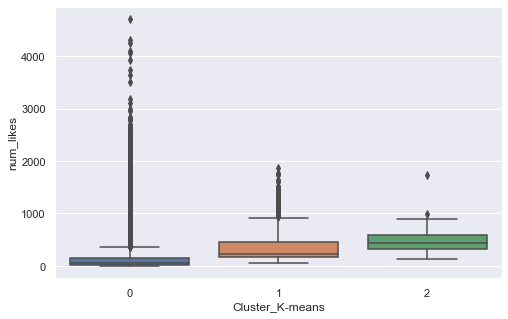

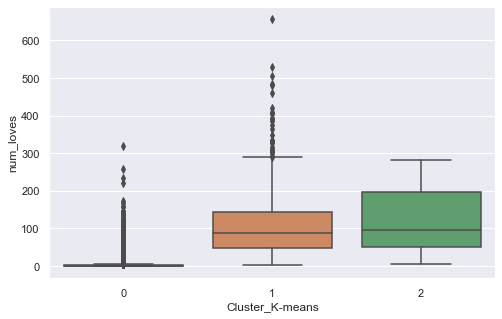

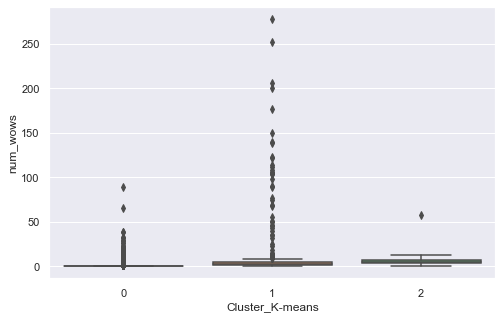

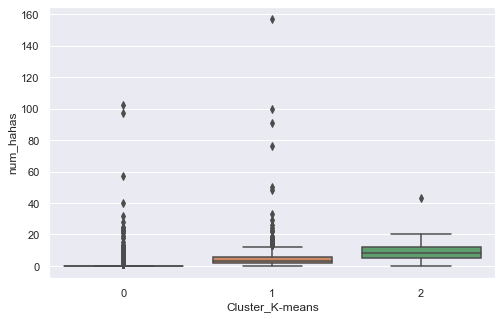

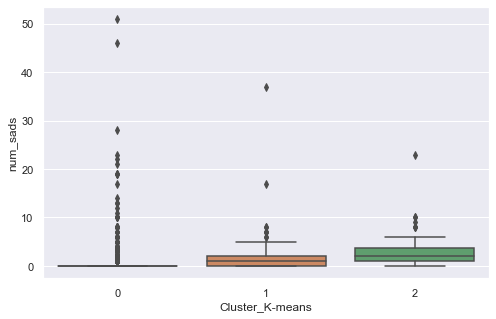

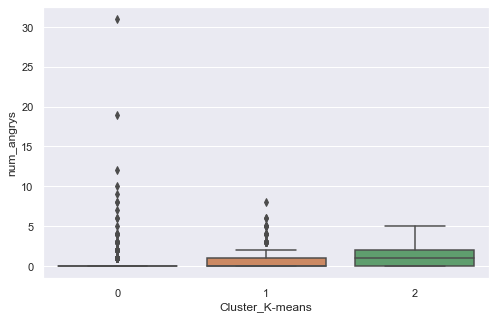

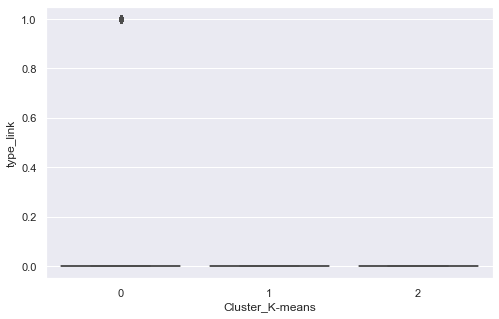

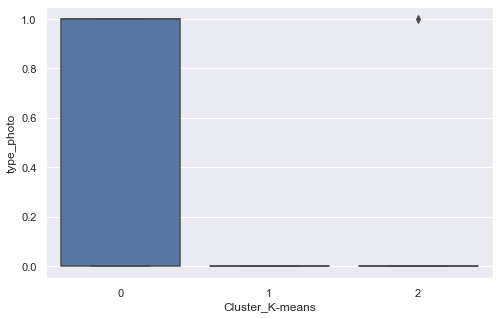

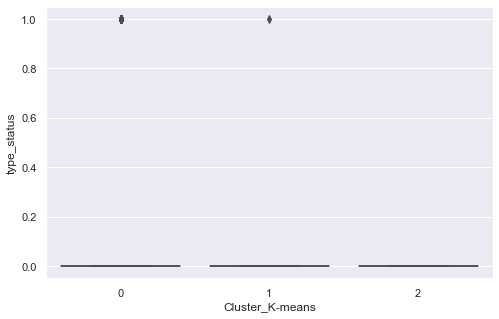

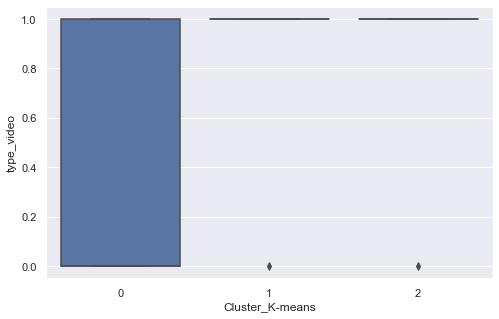

In [36]:
columns = df_cluster.columns[:-1]

    
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster_K-means', y=i, data=df_cluster)

- En la gráfica se observan diferencias en las medias de los clusters, por lo que se concluye que el factor principal que ha tomado el modelo para hacer la clusterización es el número de comenterios, y después el número y tipo de reacciones.

## Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

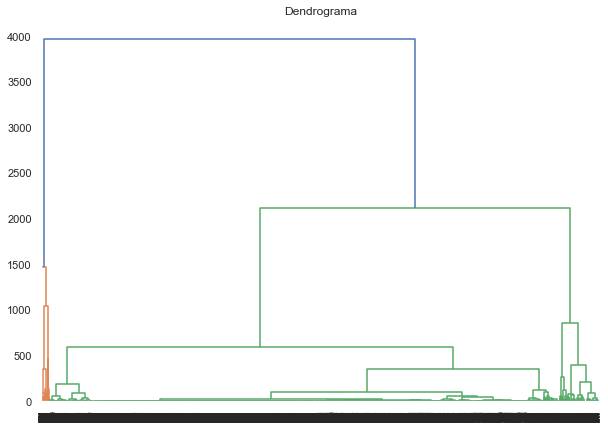

In [37]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dendro = shc.dendrogram(shc.linkage(df_pca, method='ward'))

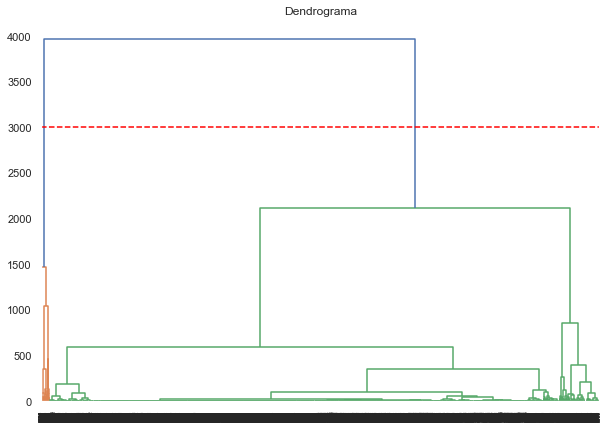

In [38]:
#Defino un umbral en 3000 (publicaciones) y dibujo una línea horizontal que atraviese la línea vertical más larga
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dendro = shc.dendrogram(shc.linkage(df_pca, method='ward'))
plt.axhline(y=3000, color='red', linestyle='--')

- La línea vertical con mayor distancia es la línea azul , por lo que se definen 2 clusters (naranja y verde), en cambio en el modelo de K-means se recomiendan 3 clusters. 
- Se utilizarán 2 clusters.

**Modelo: Aglomerativo**

In [39]:
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
aglo.fit(df_pca)

aglo_pred = aglo.labels_

aglo_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
df_cluster['Cluster_Agglomerative'] = aglo_pred
df_cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,Cluster_K-means,Cluster_Agglomerative
0,529,512,262,432,92,3,1,1,0,0,0,0,1,0,0
1,150,0,0,150,0,0,0,0,0,0,1,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1,0,0
3,111,0,0,111,0,0,0,0,0,0,1,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0,0,0


In [41]:
df_cluster.Cluster_Agglomerative.value_counts()

0    6893
1     104
Name: Cluster_Agglomerative, dtype: int64

<AxesSubplot:xlabel='Cluster_Agglomerative', ylabel='count'>

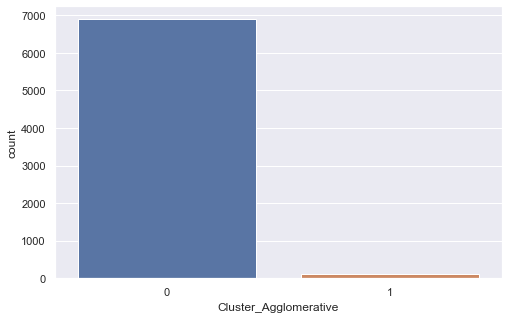

In [42]:
sns.countplot(x = df_cluster.Cluster_Agglomerative)

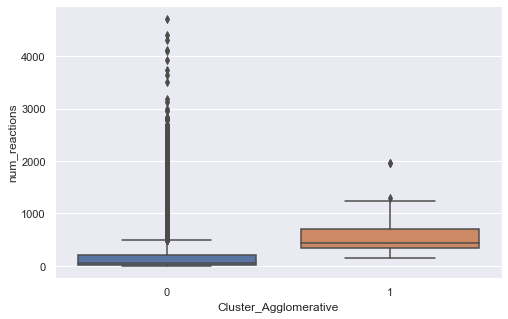

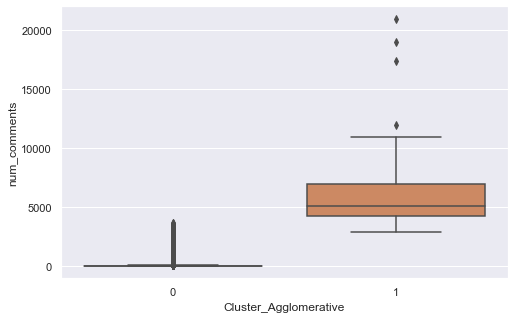

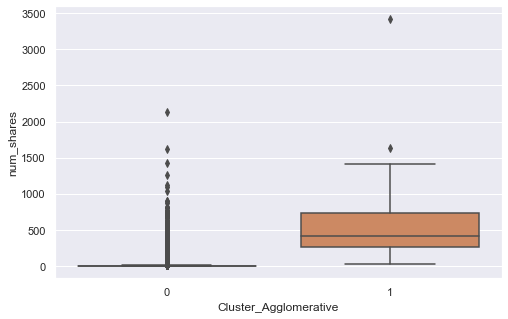

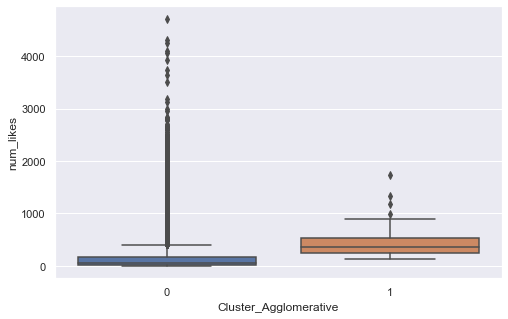

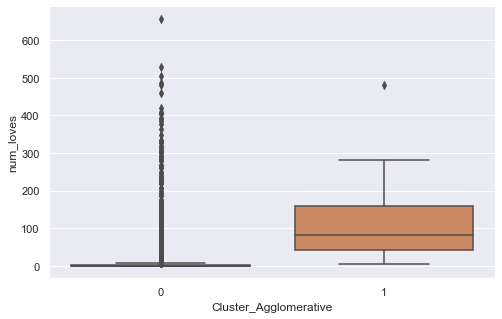

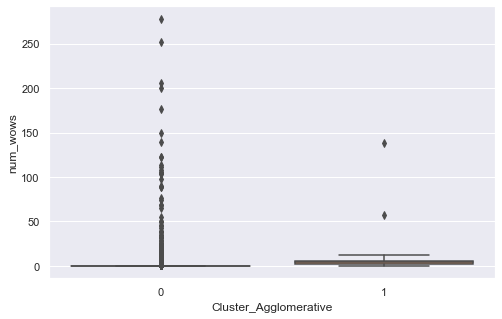

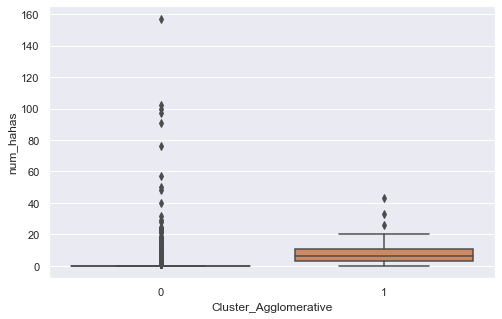

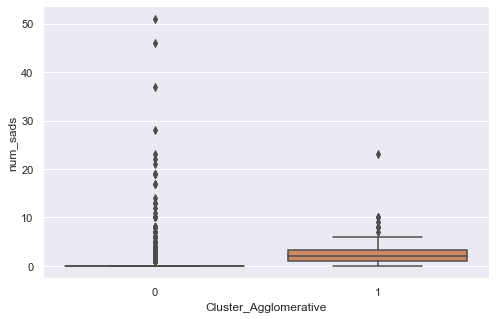

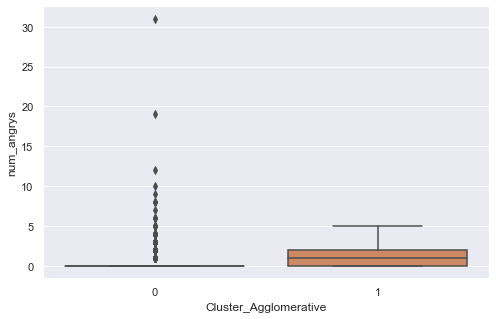

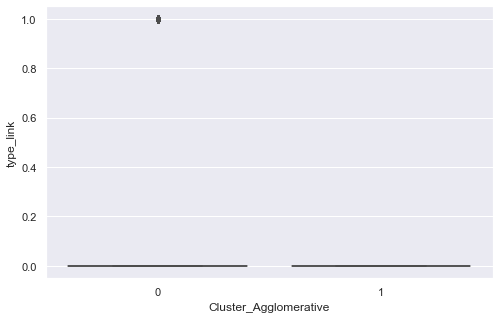

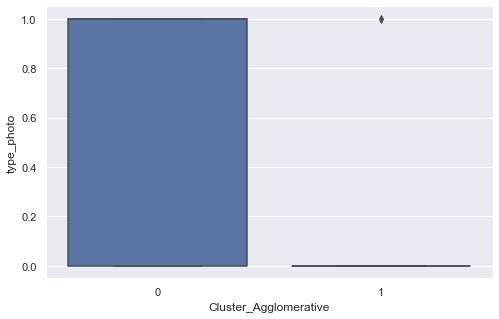

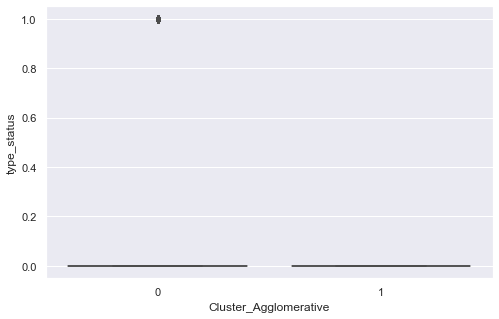

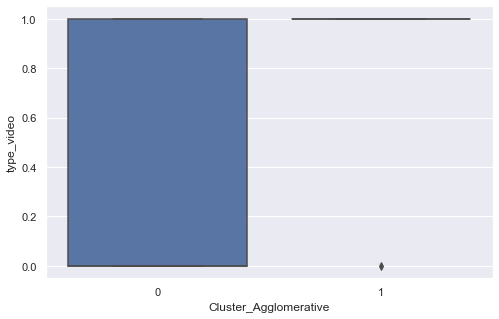

In [43]:
columns = df_cluster.columns[:-2]

    
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster_Agglomerative', y=i, data=df_cluster)


- Se observa que la principal variable utilizada por el modelo para la clusterización fue el número de reacciones, y dentro de estas los "Me gusta" y "Me encanta". En menor medida tuvo también en cuenta el número de comentarios.

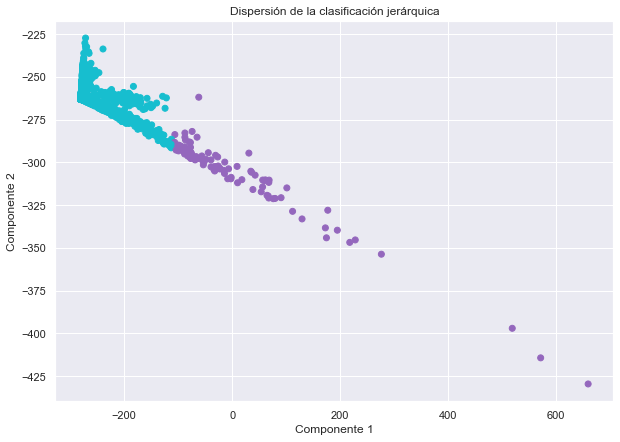

In [44]:
plt.figure(figsize=(10, 7))  

colors = np.array(['#17becf','#9467bd'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'], c=colors[aglo.labels_])
plt.title('Dispersión de la clasificación jerárquica')
plt.show()


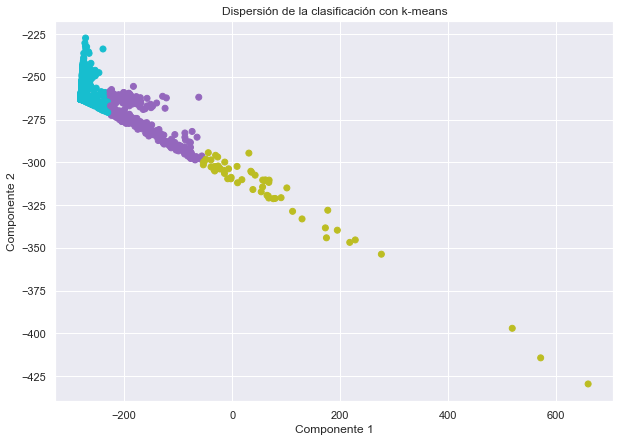

In [45]:
plt.figure(figsize=(10, 7))

colors = np.array(['#17becf','#9467bd','#bcbd22'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'], c=colors[k_means_pred])
plt.title('Dispersión de la clasificación con k-means')
plt.show()

- En ambos casos se observan los clusters bien delimitados.

## Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [46]:
from sklearn.metrics import silhouette_score


k_means_score = silhouette_score(df, k_means.labels_, metric='euclidean')

aglo_score = silhouette_score(df, aglo.labels_, metric='euclidean')

print('El resultado de la prueba de silhouette para el modelo k-means es de:', k_means_score,
      '\nEl resultado de la prueba de silhouette para el modelo jerárquico es de:', aglo_score)

El resultado de la prueba de silhouette para el modelo k-means es de: 0.7574497790645135 
El resultado de la prueba de silhouette para el modelo jerárquico es de: 0.8850375434161767


- Se graficará "Silhoutte Score" para diferente números de clústers

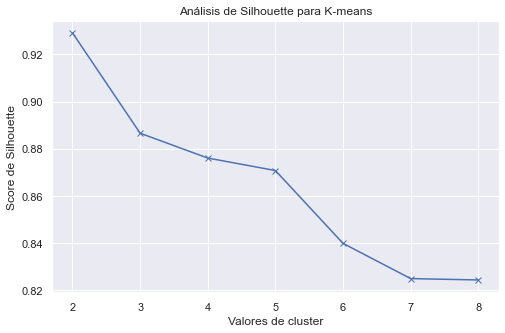

In [47]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_pca)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df_pca, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
    
plt.xlabel('Valores de cluster') 
plt.ylabel('Score de Silhouette') 
plt.title('Análisis de Silhouette para K-means')
plt.show()


- A diferencia del "Elbow Method", Silohutte propone 2 clúster para k-means. 
- Se lo dividirá en dos y luego se obtendrá el silohuette score.

In [48]:
k_means2 = KMeans(n_clusters=2, random_state=42)
k_means2.fit(df_pca)

#predicciones
k_means_pred2 = k_means2.predict(df_pca)
k_means_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
k_means_score2 = silhouette_score(df, k_means_pred2, metric='euclidean')

k_means_score2

0.8679236736825717

- Se observa una mejora del score de Silhouette (0.867), aunque es menor que la obtenida en el modelo jerárquico (0.885).

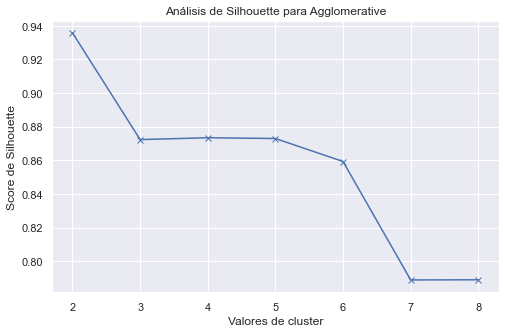

In [50]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 aglo = AgglomerativeClustering(n_clusters=num_clusters)
 aglo.fit(df_pca)
 cluster_labels = aglo.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df_pca, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
    
plt.xlabel('Valores de cluster') 
plt.ylabel('Score de Silhouette') 
plt.title('Análisis de Silhouette para Agglomerative')
plt.show()

**Conclusiones** 

- 1) La clusterización más adecuada al parecer es en dos grupos. De elegir lo anterior, con el modelo Aglomerativo se obtiene un resultado de Silhouette más alto (0,885).
- 2) El modelo Aglomerativo realiza la clusterización poniendo enfásis en las publicaciones, teniendo en cuente el número de reacciones de estas.
- 3) Si se desea poner enfásis en los comentarios más que en el número de reacciones se obtienen mejores resultados haciendo la clusterización de los datos en tres grupos, como propuesto por el "Elbow Method". 
- 4) Con el "Elbow Method" el resultado de Score de Silhoutte utilizando una clusterización de tres grupos, con el modelo K-means es de 0.757.
- 5) Se puede concluir que los modelos dieron buenas score, por lo que va a primar en la elección el análisis que se desee realizar.  